In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


2016 average fuel economy is 24.7 mpg
https://www.reuters.com/article/us-autos-emissions/u-s-vehicle-fuel-economy-rises-to-record-24-7-mpg-epa-idUSKBN1F02BX
downloaded 14 Dec 2018

In [3]:
mpg2016=24.7

In [4]:
weight=data["weight"]
mpg=data["mpg"]

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, roc_curve

## Repeat with a train-test split

In [6]:
import random
random.seed(99)
def train_test_split(x,y,f=.75):
    # Force between 10 and 90 percent training data
    f=max(.1, min(f,.9))
    # shuffle the indices of the original data
    n=len(x)
    ntrain=round(f*n)
    indices=list(range(n))
    random.shuffle(indices)
    ind_train=indices[:ntrain]
    ind_test=indices[ntrain:]
    XTRAIN=x[ind_train]; YTRAIN=y[ind_train]
    XTEST=x[ind_test]; YTEST=y[ind_test]
    return(XTRAIN,YTRAIN,XTEST,YTEST)


In [7]:
X=np.array(weight)
Y=np.array([1 if z<mpg2016 else 0 for z in mpg])
XTRAIN,YTRAIN, XTEST, YTEST=train_test_split(X,Y,f=.5)
XTRAIN=XTRAIN.reshape(-1,1)
XTEST=XTEST.reshape(-1,1)

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [9]:
r=LR().fit(XTRAIN,YTRAIN)
b=r.coef_[0,0]
a=r.intercept_[0]
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= -4.363563244788132
b (slope)= 0.0016811952663158473
x0 (50% point)= 2595.512450109615


In [10]:
YP=r.predict(XTEST)
confusion_matrix(YTEST,YP)

array([[66, 16],
       [17, 97]])

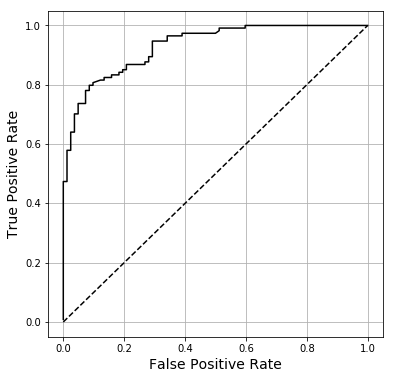

In [11]:
probs=r.predict_proba(XTEST)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,probs)
plt.plot(fpr,tpr, c="k")
plt.plot([0,1],[0,1],c="k",ls="--")

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")

In [12]:
def ROC(Y,Prob):
    if (len(Y)!=len(Prob)):
        print("Length mismatch")
        return([])
    P=sum(Y)
    N=len(Y)-P

    if (P<1) or (N<1):
        print("There must be both postive and negative examples")
        return([])
    YP=list(zip(Y,Prob))
    YP.sort(reverse=True, key=lambda a:a[-1])
    Lsorted,f=zip(*YP)
    FP=0; TP=0
    R=[]
    fprev=float("-inf")
    i=0
    
    while i < len(Lsorted):
        if f[i]!= fprev:
            R.append([FP/N, TP/P])
            #print(FP/N, TP/P, YP[i][1])
            fprev=f[i]
        if Lsorted[i]>0:
            TP+=1
        else:
            FP+=1
        i+=1
     
    R.append([FP/N, TP/P])
    return(R)
FPR,TPR=zip(*ROC(YTEST,probs))

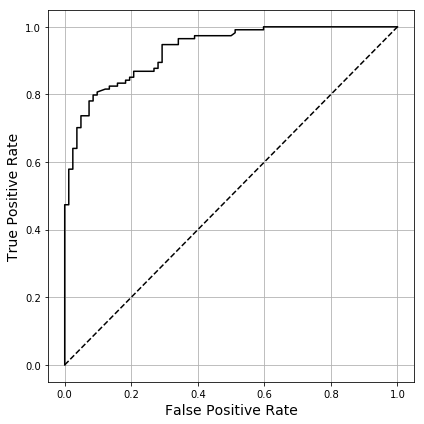

In [13]:
plt.plot(FPR,TPR,c="k")
plt.grid()
plt.plot([0,1],[0,1],c="k",ls="--")
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig("ROC-CURVE-GAS-GUZZLER-LOGISTIC-REGRESSION-MODEL.pdf")


In [14]:
def ConfMat(OBS,PRED):
    OPS=list(zip(OBS,PRED))
    TP = sum([(O==1) and (P==1) for O,P in OPS])
    TN = sum([(O==0) and (P==0) for O,P in OPS])
    FP = sum([(P==1) and (O==0) for O,P in OPS])
    FN = sum([(P==0) and (O==1) for O,P in OPS])   
    M = np.array([[TN,FP],[FN,TP]])
    return M
ConfMat(YTEST,YP)

array([[66, 16],
       [17, 97]])

In [15]:
97/(97+17)

0.8508771929824561

In [16]:
sum(YP), 97+17

(113, 114)

In [17]:
confusion_matrix(YTEST,YP)

array([[66, 16],
       [17, 97]])

In [18]:
from sklearn import metrics as SM

In [19]:
SM.confusion_matrix(YTEST,YP)

array([[66, 16],
       [17, 97]])

In [20]:
def Metrics(OBS,PRED):
    OPS=list(zip(OBS,PRED))
    TP = sum([(O==1) and (P==1) for O,P in OPS])
    TN = sum([(O==0) and (P==0) for O,P in OPS])
    FP = sum([(P==1) and (O==0) for O,P in OPS])
    FN = sum([(P==0) and (O==1) for O,P in OPS])   
    P = sum(OBS)
    N = len(OBS)-P
    TPR = TP/P
    TNR = TN/N
    Specificity = TN/(FP+TN)
    Accuracy = (TP+TN)/(P+N)
    Precision = TP/(TP+FP)
    F=2/(1/Precision+1/TPR)
    return(TPR, TNR, Specificity, Accuracy, Precision,F)
TPR,TNR,Spec,Acc,Prec,F=Metrics(YTEST,YP)
print("TPR =         ",round(TPR,3))
print("TNR =         ",round(TNR,3))
print("Specificity = ",round(Spec,3))
print("Accuracy =    ",round(Acc,3))
print("Precision =   ",round(Prec,3))
print("F =           ",round(F,3))

TPR =          0.851
TNR =          0.805
Specificity =  0.805
Accuracy =     0.832
Precision =    0.858
F =            0.855


In [21]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score

In [22]:
accuracy_score(YTEST,YP)

0.8316326530612245

In [23]:
recall_score(YTEST,YP) # recall is same as TPR

0.8508771929824561

In [24]:
precision_score(YTEST,YP)

0.8584070796460177

In [25]:
from sklearn.metrics import f1_score
f1_score(YTEST,YP)

0.8546255506607929

In [26]:
roc_auc_score(YTEST,probs)

0.9309477963200685

In [27]:
FPR,TPR=zip(*ROC(YTEST,probs))

In [28]:
def TRAP(xvals, yvals):
    XLEFT = xvals[:-1]; XRIGHT= xvals[1:]
    YLEFT = yvals[:-1]; YRIGHT= yvals[1:]
    DX = XRIGHT-XLEFT
    print(sum(YLEFT*DX))
    return(sum(0.5*(YLEFT+YRIGHT)*DX))
TRAP(np.array(FPR), np.array(TPR))

0.9307873341891315


0.9309477963200686

In [29]:
from sklearn.metrics import auc

In [30]:
auc(FPR,TPR)

0.9309477963200685